In [2]:
import pandas as pd
import re

df = pd.read_json('DubNation_2022_11_03_10ktweet_cleaned.json')
df.head()

,Date,User,Tweet,clean_text
0,2022-11-02 23:57:58,ColdPieceCITY,RT @ColdPieceCITY: Steph = Mount Rushmore ?\n#...,steph mount rushmore
1,2022-11-02 23:56:40,HermanKosta,"RT @warriors: #DubNation, just a reminder that...",reminder text warrior get ready vote
2,2022-11-02 23:56:28,ColdPieceCITY,RT @ColdPieceCITY: - Led Warriors to their fir...,lead warrior first championship year lead warr...
3,2022-11-02 23:55:59,Sethoole,RT @warriors_bra: 🏀 GOLDEN STATE WARRIORS | 20...,golden state warrior
4,2022-11-02 23:54:23,TravelingBeee,RT @TravelingBeee: We ok with Green leaving? #...,ok green leave


In [3]:
df['clean_text'] = df['Tweet'].str.lower()

def remove_special_chars(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'#[A-Za-z_]+', ' ', text)
    text = re.sub(r'@([a-zA-Z_]{1,50})', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

df['clean_text'] = df['clean_text'].apply(lambda x: remove_special_chars(x))

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

df['clean_text'] = df['clean_text'].apply(lambda x: remove_stopwords(x))

def remove_common_words(text):
    common_words = ['lock', 'meeting', 'vs', 'nba', 'rt']
    tokenized_text = text.split(' ')
    return ' '.join([w for w in tokenized_text if not w in common_words])

df['clean_text'] = df['clean_text'].apply(lambda x: remove_common_words(x))

from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

def lemmatize_words(text):
    # find pos tags
    pos_text = pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])

df['clean_text'] = df['clean_text'].apply(lambda x: lemmatize_words(x))
df.head()

,Date,User,Tweet,clean_text
0,2022-11-02 23:57:58,ColdPieceCITY,RT @ColdPieceCITY: Steph = Mount Rushmore ?\n#...,steph mount rushmore
1,2022-11-02 23:56:40,HermanKosta,"RT @warriors: #DubNation, just a reminder that...",reminder text warrior get ready vote
2,2022-11-02 23:56:28,ColdPieceCITY,RT @ColdPieceCITY: - Led Warriors to their fir...,lead warrior first championship year lead warr...
3,2022-11-02 23:55:59,Sethoole,RT @warriors_bra: 🏀 GOLDEN STATE WARRIORS | 20...,golden state warrior
4,2022-11-02 23:54:23,TravelingBeee,RT @TravelingBeee: We ok with Green leaving? #...,ok green leave


Pozitív hangulatú mondatok száma:  3606
Negatív hangulatú mondatok száma:  2057


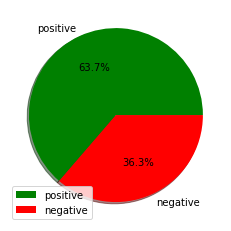

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df["sentiment_score"] = df["Tweet"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df["sentiment"] = np.select([df["sentiment_score"] < 0, df["sentiment_score"] == 0, df["sentiment_score"] > 0],
                           ['negative', 'neutral', 'positive'])

positive = df[df['sentiment'] == 'positive'].shape[0]
negative = df[df['sentiment'] == 'negative'].shape[0]

print('Pozitív hangulatú mondatok száma: ', positive)
print('Negatív hangulatú mondatok száma: ', negative)

ratings = ['positive', 'negative']
slices = [positive, negative]
colors = ['green', 'red']

plt.pie(slices, labels=ratings, colors=colors, shadow=True, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()